# Comparative Analysis of Regression Algorithms: Multiple, Polynomial & Ridge                                                    Regression

### A practical example of utilizing different regression algorithms, with the classic Boston Housing Dataset

## Introduction to the Problem

In this example, we have data relating to housing in different suburbs and towns of Boston, a city in the USA.
There are 13 features in this dataset, which are believed to have an impact on the house prices in Boston.
The goal is to predict the House Prices for different Boston towns/suburbs, using the Regression Algorithm.

## Boston Housing Dataset

Let's explore the features of the dataset:

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

   - CRIM: per capita crime rate by town
   - ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
   - INDUS: proportion of non-retail business acres per town
   - CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Categorical)
   - NOX: nitric oxides concentration (parts per 10 million)
   - RM: average number of rooms per dwelling
   - AGE: proportion of owner-occupied units built prior to 1940
   - DIS: weighted distances to ﬁve Boston employment centers
   - RAD: index of accessibility to radial highways
   - TAX: full-value property-tax rate per 10000 Dollars
   - PTRATIO: pupil-teacher ratio by town 
   - B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
   - LSTAT: % lower status of the population
   - MEDV: Median value of owner-occupied homes in Dollars(000's)   (Target)
   

## Importing the required Libraries

In [1]:
import numpy as np           #NumPy and Pandas for Data Wrangling Analysis operations
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt     # Seaborn and Matplotlib for Data visualization & EDA

## Loading the Dataset

In [2]:
col_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv('housing.csv',header= None, sep='\s+',names= col_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Wrangling and EDA

Let's explore the basic characteristics of our data,visualize it to identify relationships, and clean it for better model performance.

In [3]:
df.shape   #checking the shape of the dataset

(506, 14)

In [4]:
df.describe()  # Descriptive statistics 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Scatter Plots 

Let's use Seaborns Pairplot to identify the type of relationship each feature has with the Price(Target), and also if there is any relationship between the independant variables.

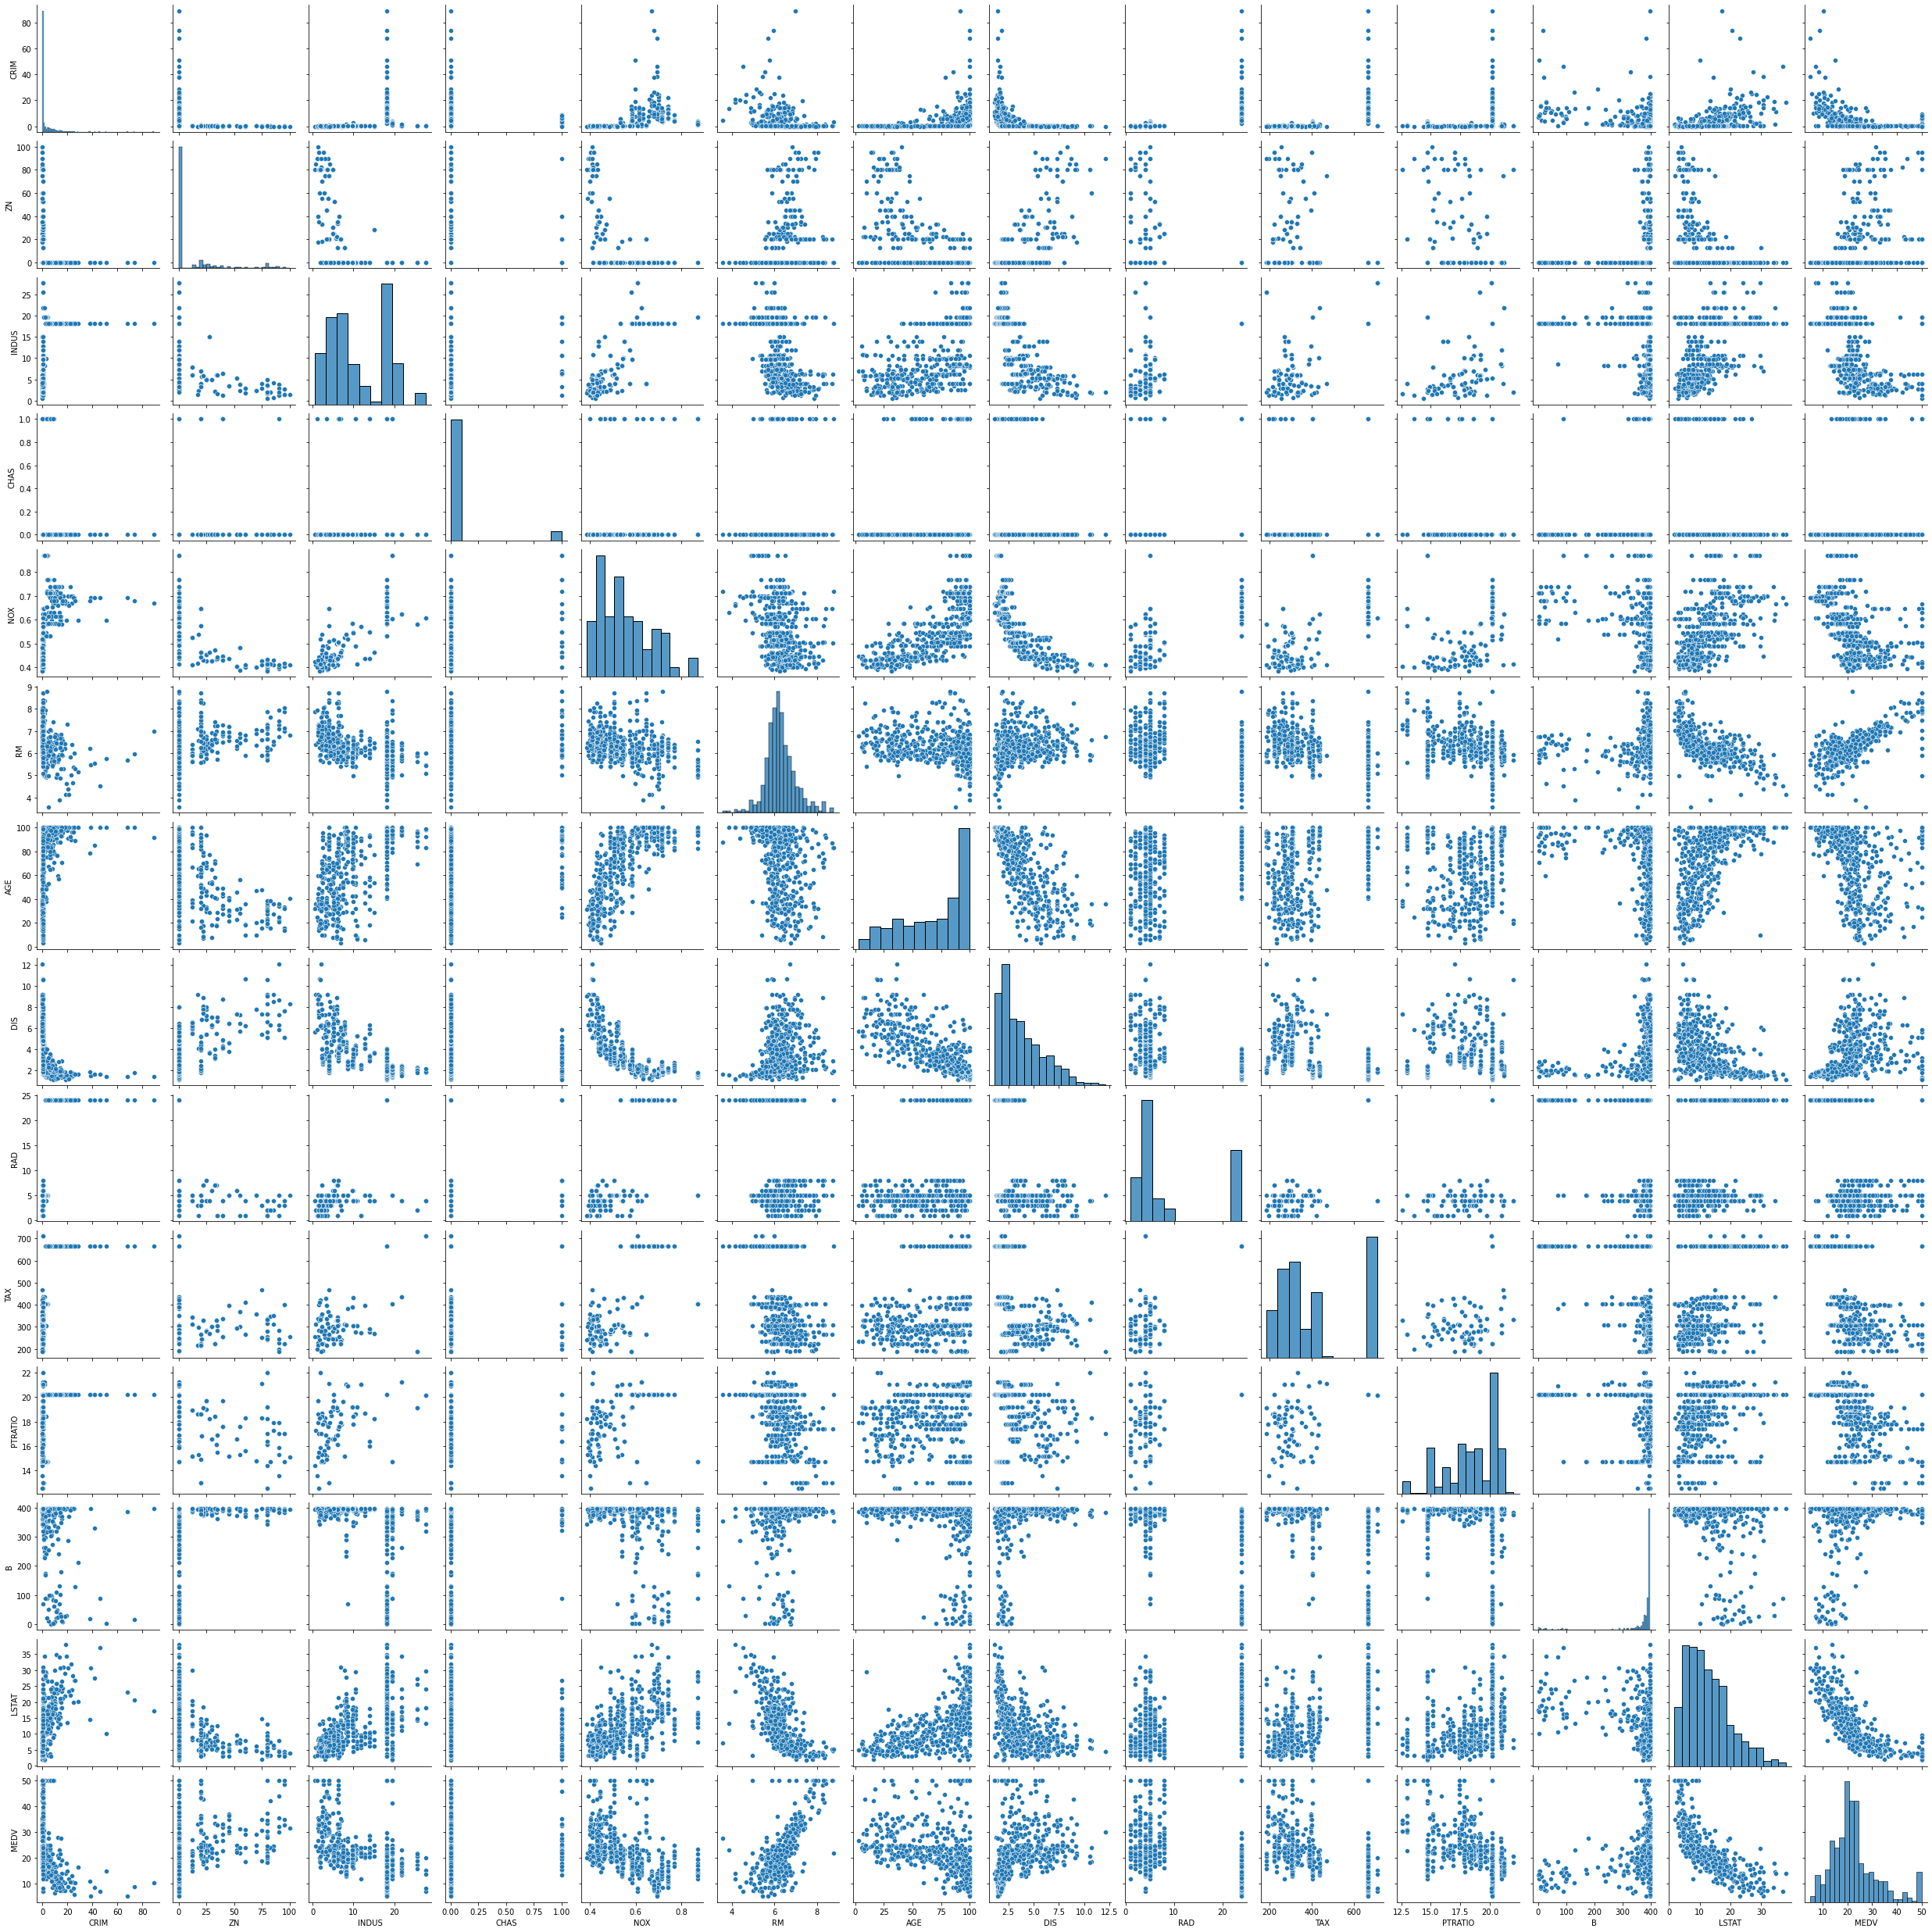

In [9]:
sns.pairplot(df)

Features like 'RM', 'LSTAT','INDUS' clearly have a strong relationship with 'MEDV', but it isn't exactly a Linear Relationship.
'DIS' and 'NOX' are highly correlated and have a strong relationship, leading to Multicollinearity.

## Distribution Plots

Let's examine the distribution of each feature, to identify if it is skewed or normal.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

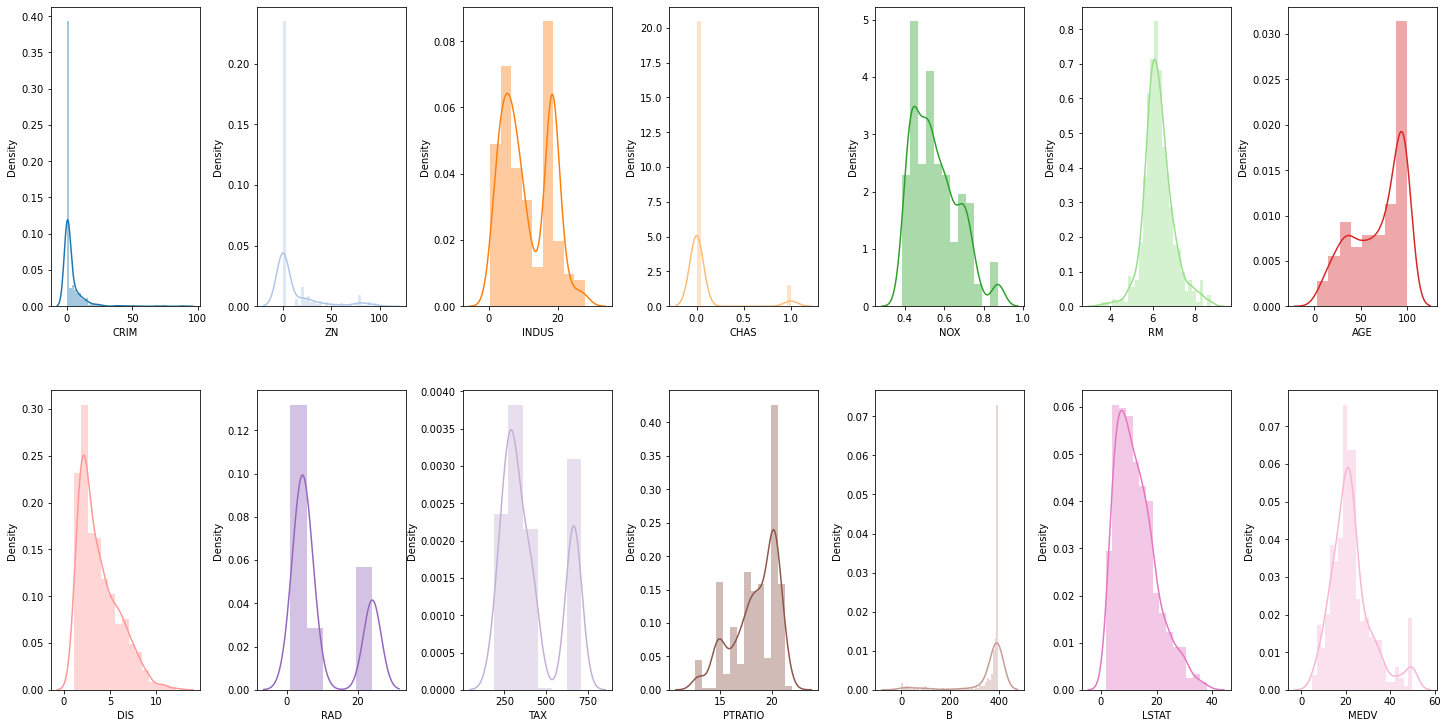

In [7]:
fig,ax= plt.subplots(nrows=2,ncols=7,figsize=(20,10))
index=0
cols=df.columns
colors=sns.color_palette("tab20")
for i in cols:
    sns.distplot(df[i],ax=ax.flatten()[index],color=colors[index])
    index += 1
    
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=5.0)

- 'CRIM' has a right skew, and most of the values are 0. Same for 'ZN' and 'DIS'
- 'B' has a left skew, and most of the values appear to be outliers.
- 'CHAS' is a categorical variable, with a majority of values being 0.
- The remaining features have unimodal and bimodal distributions.
- 'MEDV' has a few outliers


## Box Plots 

Let's create boxplots, to get a better idea of outliers.

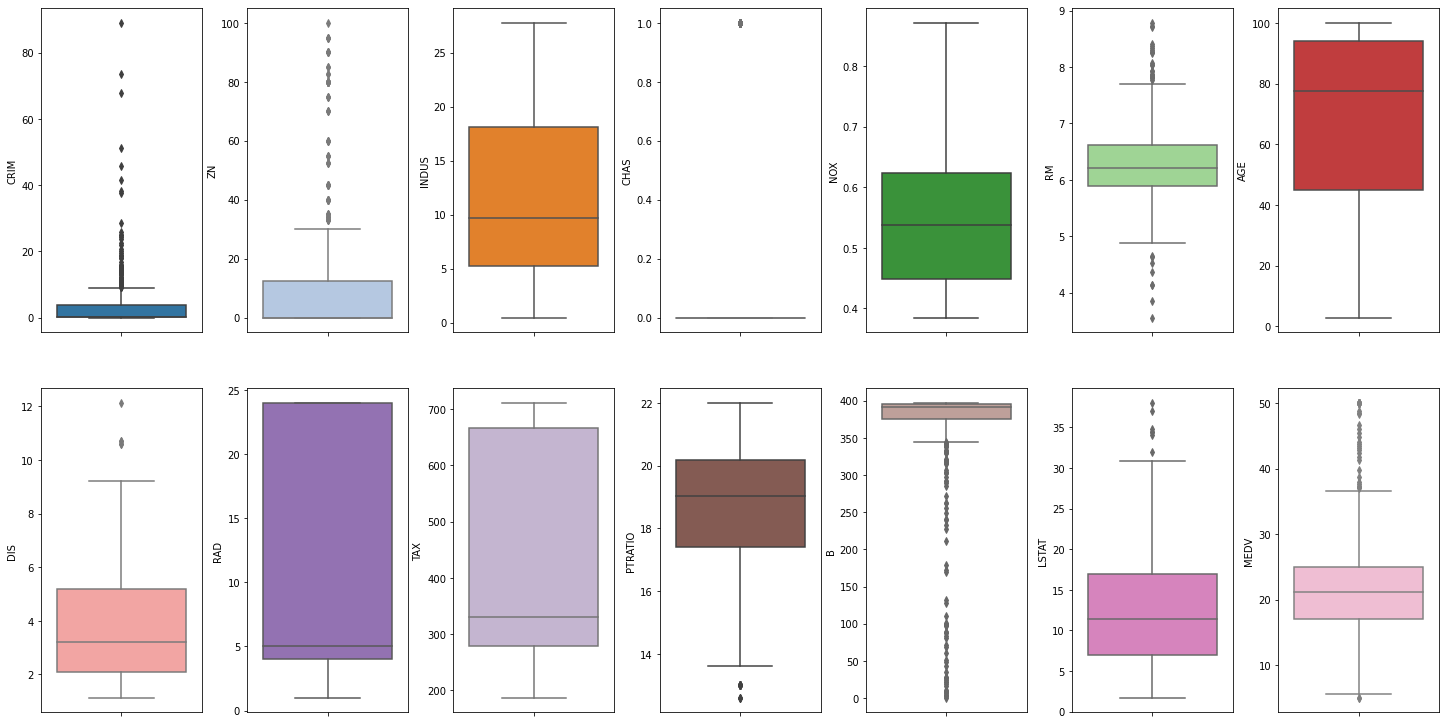

In [8]:
fig,ax= plt.subplots(nrows=2,ncols=7,figsize=(20,10))
index=0
cols=df.columns
colors=sns.color_palette("tab20")
for i in cols:
    sns.boxplot(y=df[i],data=df,ax=ax.flatten()[index],color=colors[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Since the dataset has capped the maximum value of homes to 50,000 Dollars, that is the highest value of homes shown.It is most likely that these homes were much more than 50,000 Dollars at the time. So, Let's remove the outliers(Price=$50,000) in the MEDV column for better results.

In [10]:
df1=df[~(df['MEDV'] >= 50.0)]   #removing outliers from target variable i.e. MEDV
print(np.shape(df1))

(490, 14)


The column 'CHAS' is a categorical variable with a majority of entries which are 0, so it is not a useful feature.
The columns 'CRIM','ZN','B' are proportional variables, with mostly 0's and a large number of outliers, so it's better to drop these features for the purpose of this analysis.

In [11]:
df2=df1.drop(['CRIM','ZN','CHAS','B'],axis=1)   
print(df2.shape)

(490, 10)


## Regression Plots 

Let's use Seaborns Regression plots to identify non-linear relationships in our data.

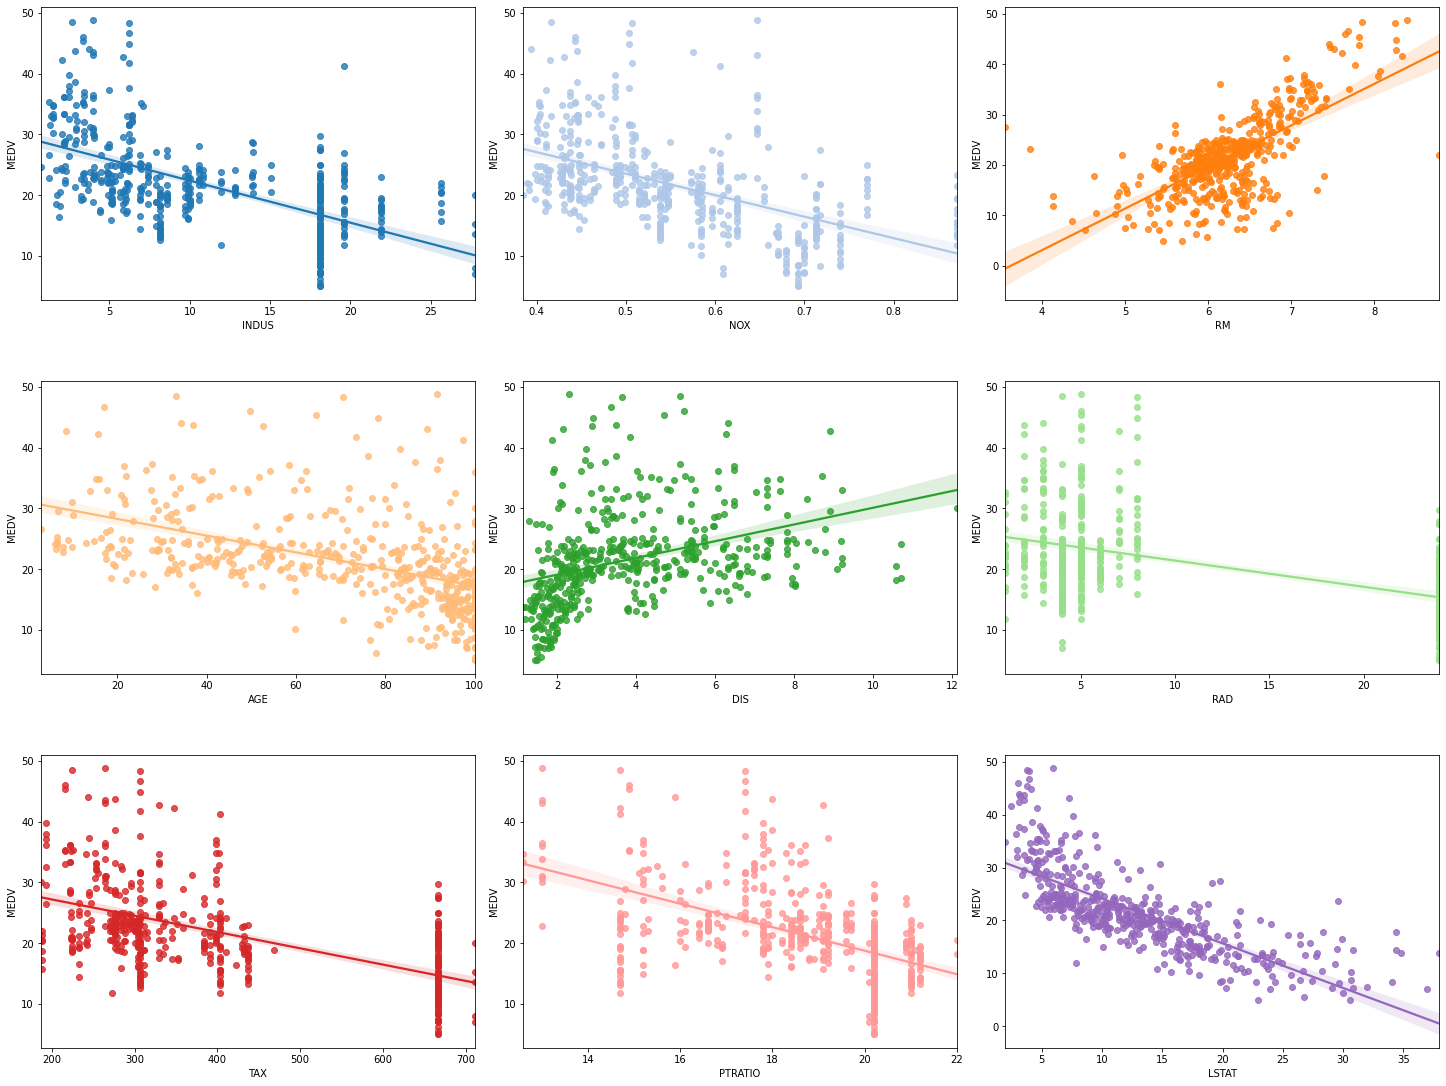

In [12]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(20,15))
index=0
cols=df2.columns[:-1]
colors=sns.color_palette("tab20")
for i in cols:
    sns.regplot(x=df2[i],y=df2['MEDV'],data=df,ax=ax.flatten()[index],color=colors[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The above plots show us how the data points of each feature fall around the fitted regression line.

Let's closely examine the curvilinear relationships:


### INDUS & Price

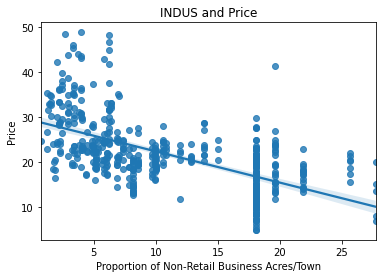

In [13]:
sns.regplot(x=df2['INDUS'],y=df2['MEDV'])
plt.xlabel("Proportion of Non-Retail Business Acres/Town")
plt.ylabel("Price")
plt.title("INDUS and Price")
plt.show()

### LSTAT & Price

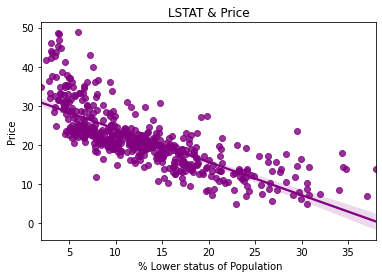

In [14]:
sns.regplot(x=df2['LSTAT'],y=df2['MEDV'],color='purple')
plt.xlabel(" % Lower status of Population")
plt.ylabel("Price")
plt.title("LSTAT & Price")
plt.show()

## Correlation Analysis

Finally, let's generate a Heatmap to see how the features are correlated to the target, and also if there is Multicollinearity present.

<AxesSubplot:>

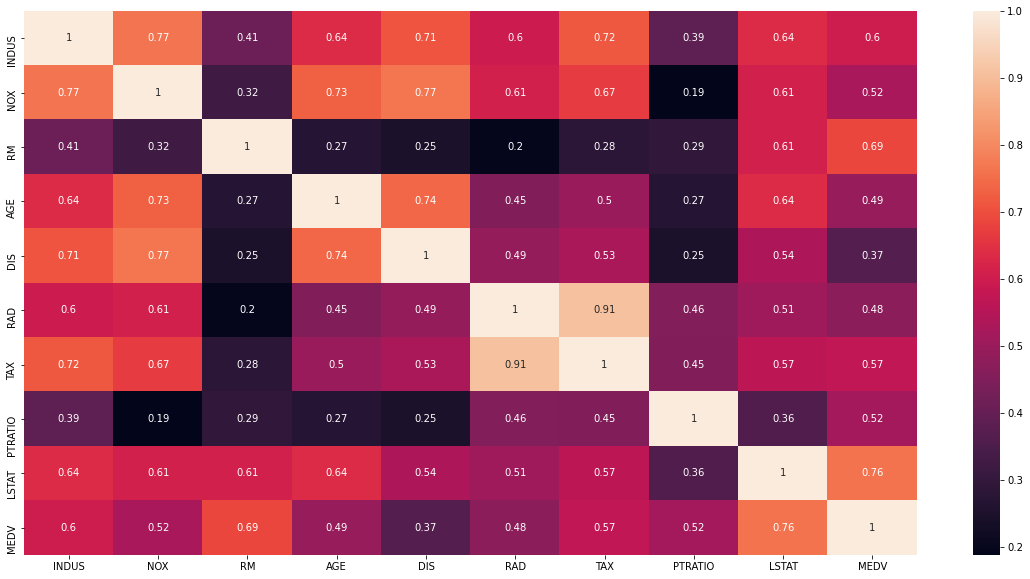

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr().abs(),annot=True)

Almost all features have high positive correlation with the Price('MEDV'), and we will keep them.


As RAD has high positive correlation with TAX i.e 0.91, it's better to drop this feature as well. 
RAD is a categorical ordinal variable with values 1-24, indicating ordered ranks (higher the number,greater the accesibility to highways).

In [16]:
df3=df2.drop('RAD',axis=1)
print(df3.shape)

(490, 9)


## Defining Features and Target

Let's define the features and target as X and Y.

In [17]:
X= df3.drop('MEDV',axis=1) 
Y= df3['MEDV']

In [18]:
print(X.shape)  #checking the shape of the data
print(Y.shape)

(490, 8)
(490,)


## Standardizing the Data

Let's standardize the features and targets, and it helps overcoming differences in the magnitude of values. 

Sklearn provides the StandardScaler functionality in its preprocessing module for this purpose.

In [19]:
from sklearn.preprocessing import StandardScaler

### Scaling Inputs:

In [20]:
scaler= StandardScaler()   #creating and fitting the scaler object
scaler.fit(X)

StandardScaler()

In [21]:
X_scaled=scaler.transform(X)   #tranforming values

### Scaling Target:

In [24]:
Y_scaler=StandardScaler()
Y_matrix=Y.values.reshape(-1,1) #reshaping the Target column, as Sklearn accepts only 2D objects
Y_scaler.fit(Y_matrix)
Y_scaled=Y_scaler.transform(Y_matrix)

## Splitting the Data into Train & Test Sets

Let's split the data into train and test sets using a 75/25 split:

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y_scaled, test_size=0.25, random_state=42)

## Multiple Linear Regression

Let's use Sklearns LinearRegression module for creating the Regression Model.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
mlr= LinearRegression()     #creating the regression object

In [28]:
mlr.fit(x_train,y_train)    #fitting the training data 

LinearRegression()

In [29]:
y_train_pred=mlr.predict(x_train)   #predicting target for training data

## Model Evaluation



<img src="a1.png">

<img src="a2.png">

Let's calculate the Mean Absolute Error(MAE),RMSE and R^2 to evaluate Model Performance:

In [30]:
from sklearn.metrics import r2_score

### Training Accuracy 

In [33]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_train_pred - y_train)))
print("RMSE: %.2f" % np.sqrt(((y_train_pred - y_train) ** 2).mean()))
print("R2-score: %.2f" % r2_score(y_train,y_train_pred ))

Mean absolute error: 0.38
RMSE: 0.50
R2-score: 0.76


### Test Accuracy

In [34]:
yhat1=mlr.predict(x_test) #predicting target for testing data

In [36]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat1 - y_test)))
print("RMSE: %.2f" % np.sqrt(((yhat1- y_test) ** 2).mean()))
print("R2-score: %.2f" % r2_score(y_test,yhat1 ))

Mean absolute error: 0.38
RMSE: 0.49
R2-score: 0.71


- As you can see, the Training Accuracy is 76% and the Test Accuracy is 71%. 
- The RMSE is almost the same i.e 0.5 for both Train and Test Sets. Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

## Polynomial Regression

Let's transform our features with curvilinear relationships i.e 'INDUS','LSTAT','NOX', to higher order Polynomials, and see if it improves the Regression performance. 

To do so, we will use PolynomialFeatures from Sklearns Preprocessing module:

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [135]:
pr= PolynomialFeatures(degree=3)        #creating a PolynomialFeatures object with 3 degrees

poly_features=pr.fit_transform(X[['INDUS','LSTAT','NOX']])      #fitting and transforming our variables
poly_features

array([[ 1.        ,  2.31      ,  4.98      , ..., 13.3426152 ,
         1.44143112,  0.15572087],
       [ 1.        ,  7.07      ,  9.14      , ..., 39.1800724 ,
         2.01044354,  0.10316171],
       [ 1.        ,  7.07      ,  4.03      , ...,  7.6169821 ,
         0.88644283,  0.10316171],
       ...,
       [ 1.        , 11.93      ,  5.64      , ..., 18.2269008 ,
         1.85177556,  0.18813252],
       [ 1.        , 11.93      ,  6.48      , ..., 24.0604992 ,
         2.12757192,  0.18813252],
       [ 1.        , 11.93      ,  7.88      , ..., 35.5800912 ,
         2.58723252,  0.18813252]])

Let's transform this array to a Pandas Dataframe, and the columns are the new polynomial features returned by Sklearn.

So a 3rd Degree Polynomial tranformation to our 3 Features, resulted in 20 new columns! 

The higher the degree, the more Polynomial Features generated.

In [119]:
polynomials=pd.DataFrame(poly_features,columns=['Bias','x1(INDUS)','x2(LSTAT)','x3(NOX)','x1^2','x1*x2','x1*x3','x2^2','x2*x3','x3^2','x1^3','x1^2*x2','x1^2*x3','x2^2*x1','x1*x2*x3','x3^2*x1','x2^3','x2^2*3','x3^2*x2','x3^3'])
polynomials

,Bias,x1(INDUS),x2(LSTAT),x3(NOX),x1^2,x1*x2,x1*x3,x2^2,x2*x3,x3^2,x1^3,x1^2*x2,x1^2*x3,x2^2*x1,x1*x2*x3,x3^2*x1,x2^3,x2^2*3,x3^2*x2,x3^3
0,1.0,2.31,4.98,0.538,5.3361,11.5038,1.24278,24.8004,2.67924,0.289444,12.326391,26.573778,2.870822,57.288924,6.189044,0.668616,123.505992,13.342615,1.441431,0.155721
1,1.0,7.07,9.14,0.469,49.9849,64.6198,3.31583,83.5396,4.28666,0.219961,353.393243,456.861986,23.442918,590.624972,30.306686,1.555124,763.551944,39.180072,2.010444,0.103162
2,1.0,7.07,4.03,0.469,49.9849,28.4921,3.31583,16.2409,1.89007,0.219961,353.393243,201.439147,23.442918,114.823163,13.362795,1.555124,65.450827,7.616982,0.886443,0.103162
3,1.0,2.18,2.94,0.458,4.7524,6.4092,0.99844,8.6436,1.34652,0.209764,10.360232,13.972056,2.176599,18.843048,2.935414,0.457286,25.412184,3.958769,0.616706,0.096072
4,1.0,2.18,5.33,0.458,4.7524,11.6194,0.99844,28.4089,2.44114,0.209764,10.360232,25.330292,2.176599,61.931402,5.321685,0.457286,151.419437,13.011276,1.118042,0.096072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1.0,11.93,9.67,0.573,142.3249,115.3631,6.83589,93.5089,5.54091,0.328329,1697.936057,1376.281783,81.552168,1115.561177,66.103056,3.916965,904.231063,53.580600,3.174941,0.188133
486,1.0,11.93,9.08,0.573,142.3249,108.3244,6.83589,82.4464,5.20284,0.328329,1697.936057,1292.310092,81.552168,983.585552,62.069881,3.916965,748.613312,47.241787,2.981227,0.188133
487,1.0,11.93,5.64,0.573,142.3249,67.2852,6.83589,31.8096,3.23172,0.328329,1697.936057,802.712436,81.552168,379.488528,38.554420,3.916965,179.406144,18.226901,1.851776,0.188133
488,1.0,11.93,6.48,0.573,142.3249,77.3064,6.83589,41.9904,3.71304,0.328329,1697.936057,922.265352,81.552168,500.945472,44.296567,3.916965,272.097792,24.060499,2.127572,0.188133


Let's concatenate our new polynomial features to the remaining features:

In [120]:
polynomials.reset_index(drop=True, inplace=True)  #resetting index before concatenating dfs

In [121]:
dfp=X.copy()
dfp.reset_index(drop=True, inplace=True)

In [122]:
print(polynomials.shape)  #checking the shape
print(dfp.shape)

(490, 20)
(490, 8)


In [123]:
poly_df=pd.concat([dfp,polynomials],axis=1)
poly_df.head()

,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,Bias,x1(INDUS),...,x1^3,x1^2*x2,x1^2*x3,x2^2*x1,x1*x2*x3,x3^2*x1,x2^3,x2^2*3,x3^2*x2,x3^3
0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,1.0,2.31,...,12.326391,26.573778,2.870822,57.288924,6.189044,0.668616,123.505992,13.342615,1.441431,0.155721
1,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,1.0,7.07,...,353.393243,456.861986,23.442918,590.624972,30.306686,1.555124,763.551944,39.180072,2.010444,0.103162
2,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,1.0,7.07,...,353.393243,201.439147,23.442918,114.823163,13.362795,1.555124,65.450827,7.616982,0.886443,0.103162
3,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,1.0,2.18,...,10.360232,13.972056,2.176599,18.843048,2.935414,0.457286,25.412184,3.958769,0.616706,0.096072
4,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,1.0,2.18,...,10.360232,25.330292,2.176599,61.931402,5.321685,0.457286,151.419437,13.011276,1.118042,0.096072


In [125]:
poly_df=poly_df.drop(['INDUS','LSTAT','NOX'],axis=1)  #dropping repetitive columns
poly_df.head()

,RM,AGE,DIS,TAX,PTRATIO,Bias,x1(INDUS),x2(LSTAT),x3(NOX),x1^2,...,x1^3,x1^2*x2,x1^2*x3,x2^2*x1,x1*x2*x3,x3^2*x1,x2^3,x2^2*3,x3^2*x2,x3^3
0,6.575,65.2,4.0900,296.0,15.3,1.0,2.31,4.98,0.538,5.3361,...,12.326391,26.573778,2.870822,57.288924,6.189044,0.668616,123.505992,13.342615,1.441431,0.155721
1,6.421,78.9,4.9671,242.0,17.8,1.0,7.07,9.14,0.469,49.9849,...,353.393243,456.861986,23.442918,590.624972,30.306686,1.555124,763.551944,39.180072,2.010444,0.103162
2,7.185,61.1,4.9671,242.0,17.8,1.0,7.07,4.03,0.469,49.9849,...,353.393243,201.439147,23.442918,114.823163,13.362795,1.555124,65.450827,7.616982,0.886443,0.103162
3,6.998,45.8,6.0622,222.0,18.7,1.0,2.18,2.94,0.458,4.7524,...,10.360232,13.972056,2.176599,18.843048,2.935414,0.457286,25.412184,3.958769,0.616706,0.096072
4,7.147,54.2,6.0622,222.0,18.7,1.0,2.18,5.33,0.458,4.7524,...,10.360232,25.330292,2.176599,61.931402,5.321685,0.457286,151.419437,13.011276,1.118042,0.096072


### Standardizing the new dataset with Polynomial Features

Now that our dataset with new features is ready, it's time to scale the data, before fitting a regression model.

Note: Always do the Polynomial Transformation BEFORE scaling the data

In [126]:
poly_scaler= StandardScaler()   
poly_scaler.fit(poly_df)
poly_scaled=poly_scaler.transform(poly_df)  #scaled polynomial features

### Train Test Split

In [127]:
x_train_poly, x_test_poly, y_train, y_test = train_test_split(poly_scaled, Y_scaled, test_size=0.25, random_state=42)

### Fitting the Polynomial Regression Model

Polynomial Regression is simply fitting the Polynomial Feature Dataset into the Linear Regression object:

In [128]:
polymodel=LinearRegression()               
polymodel.fit(x_train_poly,y_train)

LinearRegression()

In [129]:
y_train_poly_pred=polymodel.predict(x_train_poly)     # predicting target for training data

### Training Accuracy (Polynomial)

In [130]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_train_poly_pred - y_train)))
print("RMSE: %.2f" % np.sqrt(((y_train_poly_pred- y_train) ** 2).mean()))
print("R2-score: %.2f" % r2_score(y_train,y_train_poly_pred ))

Mean absolute error: 0.32
RMSE: 0.44
R2-score: 0.82


### Test Accuracy (Polynomial)

In [131]:
yhat2=polymodel.predict(x_test_poly)   # predicting target for test data

In [132]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat2 - y_test)))
print("RMSE: %.2f" % np.sqrt(((yhat2- y_test) ** 2).mean()))
print("R2-score: %.2f" % r2_score(y_test,yhat2))

Mean absolute error: 0.32
RMSE: 0.44
R2-score: 0.77


The model performance has improved significantly!

- The **Training Accuracy(R^2)** for *Polynomial Regression* is **82%**, whereas for the *basic model* it was **76%**. The **RMSE** has also come down to **0.44**, whereas in the basic model it was **0.50**. 


- The **Test accuracy(R^2)** for *Polynomial Regression* is **77%**, whereas for the *basic model* it was **71%**. The **RMSE** has also come down to **0.44**, whereas in the basic model it was **0.49**. 

## How to the find the best degree for Polynomial Regression?

We can simply create a loop to iterate over different orders of Polynomials, and compare the R^2 for each degree on the Test Data, to determine which order is the best.

It's the best practice to not exceed more than 4 degrees, as you will end up with thousand of features, leading to Multicollinearity and Overfitting.

In [54]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X[['INDUS','LSTAT','NOX']],Y, test_size=0.25, random_state=42)

Text(0.5, 1.0, 'R^2 Using Test Data')

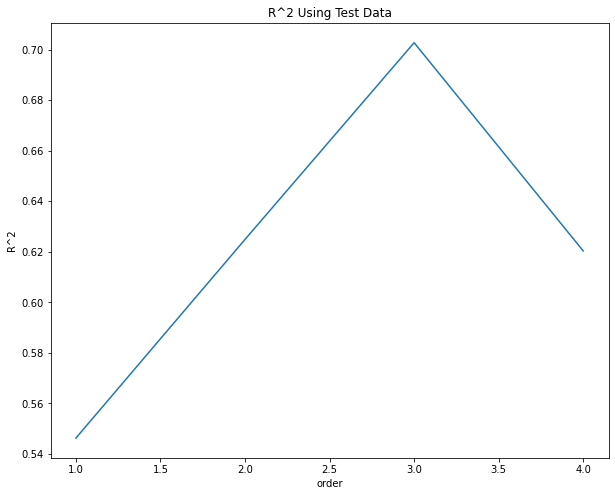

In [147]:
lr=LinearRegression()
rsquares = []

order = [1, 2, 3, 4]    #Let's iterate for 4 orders
for n in order:
    pr1 = PolynomialFeatures(degree=n)
    
    x_train_pr = pr1.fit_transform(x_train_p)
    
    x_test_pr = pr1.fit_transform(x_test_p)    
    
    lr.fit(x_train_pr, y_train_p)
    
    rsquares.append(lr.score(x_test_pr, y_test_p))

    
width = 10        
height = 8
plt.figure(figsize=(width, height))
    
plt.plot(order, rsquares)    #plotting the R^2 and the polynomial orders
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

From the plot above, A 3rd Degree Polynomial Transformation yields the highest R^2 for the test data

## Ridge Regression

Ridge Regression is a technique to overcome Multicollinearity between the independent features in the dataset.
It is most often used after a Polynomial transformation, as sometimes, a large number of newly generated polynomial features, lead to multicollinearity and overfitting, and may affect the accuracy of predictions.

Let's use the Ridge functionality in Sklearns Linear model module:

In [136]:
from sklearn.linear_model import Ridge

While creating the object, we need to specify the value for **Alpha**, which is a hyperparameter in Ridge Regression:

In [137]:
RidgeModel=Ridge(alpha=0.1)     #creating ridge object with alpha of 0.1

In [138]:
RidgeModel.fit(x_train_poly, y_train)  #fitting the ridge model on the dataset with polynomial features

Ridge(alpha=0.1)

In [139]:
yhattrain=RidgeModel.predict(x_train_poly)  #predictions for training data

In [140]:
yhatr = RidgeModel.predict(x_test_poly)  #predictions for test data

### Training Accuracy

In [141]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhattrain - y_train)))
print("RMSE: %.2f" % np.sqrt(((yhattrain- y_train) ** 2).mean()))
print("R2-score: %.2f" % r2_score(y_train,yhattrain ))

Mean absolute error: 0.33
RMSE: 0.45
R2-score: 0.81


### Test Accuracy

In [142]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhatr - y_test)))
print("RMSE: %.2f" % np.sqrt(((yhatr- y_test) ** 2).mean()))
print("R2-score: %.2f" % r2_score(y_test,yhatr))

Mean absolute error: 0.34
RMSE: 0.45
R2-score: 0.75


The model performance is good, but not better than the Polynomial Regression Model

- The **Training Accuracy(R^2)** for *Ridge Regression* is **81%**, whereas for the *Polynomial model* it was **82%**. The **RMSE** has come up to **0.45**, whereas in the Polynomial model it was **0.44**. 


- The **Test accuracy(R^2)** for *Ridge Regression* is **75%**, whereas for the *Polynomial model* it was **77%**. The **RMSE** has also come up to **0.45**, whereas in the Polynomial model it was **0.44**. 

There is a negligible change in the Model Performance, and a Ridge Regression model doesn't make a difference in our example. This may be because we have used only a 3rd degree polynomial.

However, if you are using higher orders of Polynomial features, then Ridge Regression will be very useful!

## How to choose the best value for Alpha?

Let's create a loop to iterate over different values of Alpha, and compare the R^2 scores for each alpha, to determine the best value with the highest R^2:

In [143]:
R2_test = []       # creating empty lists for R^2 scores for train and test sets
R2_train = []

Alpha = 10 * np.array(range(0,1000))    #Let's iterate over Alpha values from 0 to 1000

for alpha in Alpha:
    ridgeModel = Ridge(alpha=alpha) 
    ridgeModel.fit(x_train_poly, y_train)
    R2_test.append(ridgeModel.score(x_test_poly, y_test))
    R2_train.append(ridgeModel.score(x_train_poly, y_train))

Now, let's visualize these R^2 scores for different Alphas:

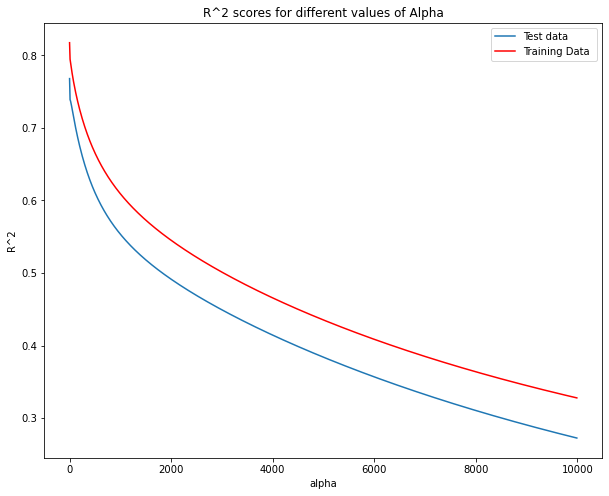

In [146]:
width = 10        
height = 8
plt.figure(figsize=(width, height))

plt.plot(Alpha,R2_test, label='Test data  ')
plt.plot(Alpha,R2_train, 'r', label='Training Data ')
plt.title("R^2 scores for different values of Alpha")
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

From the plot above, it is clear that the lowest levels of Alpha have the highest R^2, and increasing the Alpha is just worsening the model performance in our example. 

## GridSearch for the best hyperparameter 

To know exactly which value for Alpha is the best, we can use the GridSearchCV functionality of Sklearns Model Selection Module.

We already know we need a very low value of Alpha, which is close to 0. 

GridSearchCV will go through the range of hyperparameter values provided,using Cross Validation.


In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
parameters= [{'alpha':[0.001,0.1,1, 10]}]    #since we need a very small alpha, I'm providing values close to 0 only

In [150]:
RR=Ridge()  #creating a ridge object

In [151]:
#create the GridSearchCV object, providing the model you want to use, dictionary of alpha values & number of folds

Grid = GridSearchCV(RR, parameters,cv=4)

In [152]:
Grid.fit(x_train_poly,y_train)  #fit the data in the model

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10]}])

Let's use the 'best_estimator_' method of the Grid Object to find out the best Alpha:

In [100]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=0.1)

Let's find the R^2 for this alpha:

In [101]:
BestRR.score(x_test_poly,y_test)

0.7521019045967818